Import Libraries


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from collections import Counter

Data Acquisition:

In [68]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [69]:
rem_col = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(rem_col, axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
df.shape

(5572, 2)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [72]:
spam_count = df[df["v1"] == "spam"].shape[0]
ham_count = df[df["v1"] == "ham"].shape[0]
print(f"Spam emails: {spam_count}, Ham emails: {ham_count}")
print("Missing values:\n", df.isnull().sum())


Spam emails: 747, Ham emails: 4825
Missing values:
 v1    0
v2    0
dtype: int64


In [73]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [74]:
df[df.duplicated()].head()

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls


In [75]:
df = df.drop_duplicates()
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
df["v1"].value_counts()

,count
v1,
ham,4516
spam,653


EDA (Exploratory Data Analysis):

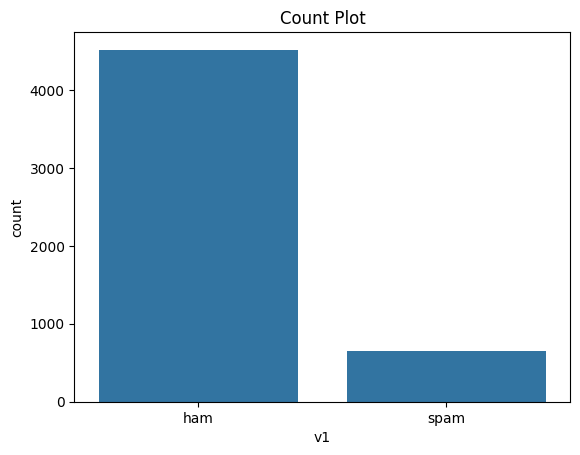

In [77]:
sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

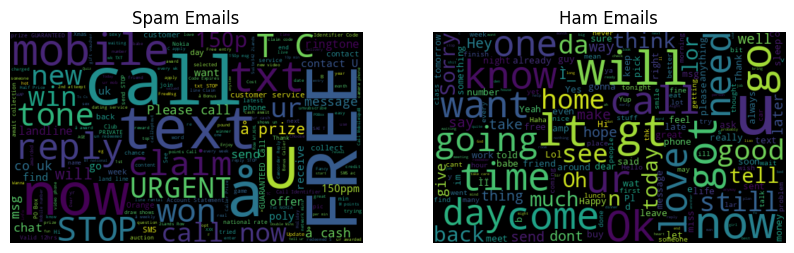

In [78]:
from wordcloud import WordCloud

spam_words = ' '.join(list(df[df['v1'] == 'spam']['v2']))
ham_words = ' '.join(list(df[df['v1'] == 'ham']['v2']))

spam_cloud = WordCloud(width=500, height=300, max_font_size=100).generate(spam_words)
ham_cloud = WordCloud(width=500, height=300, max_font_size=100).generate(ham_words)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_cloud, interpolation='bilinear')
plt.title('Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_cloud, interpolation='bilinear')
plt.title('Ham Emails')
plt.axis('off')

plt.show()


In [79]:
df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1

df.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [80]:
x=df['v2']
y=df['Category']

In [81]:
x.head()

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
y.head()

,Category
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


Feature Engineering:

In [83]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def preprocess_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df['v2'] = df['v2'].apply(preprocess_text)


Model Training

Logistic Regression :

In [84]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [85]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [86]:
model = LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [87]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.32406287787182 %
Accuracy on test data: 96.0348162475822 %


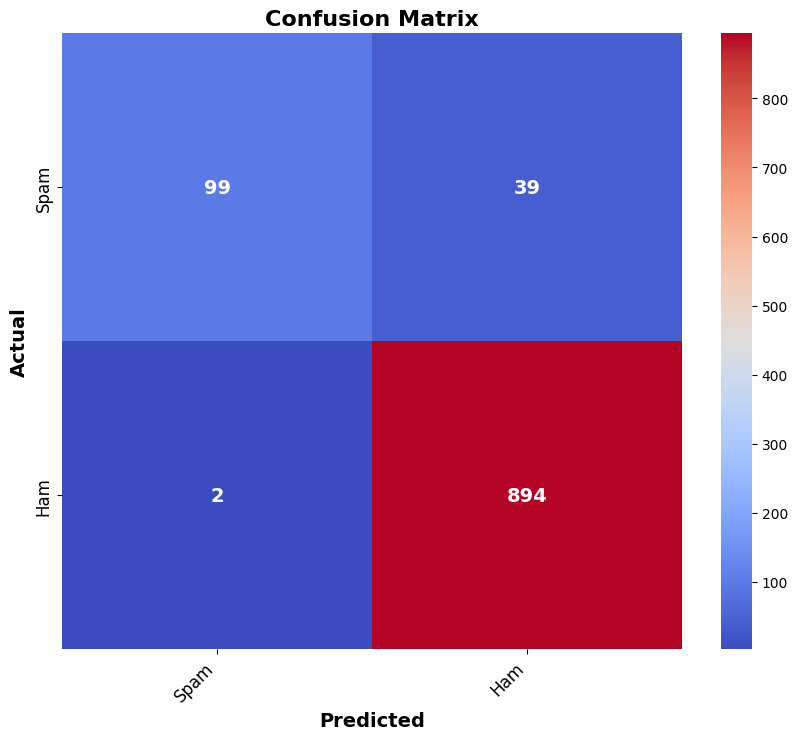

In [88]:
conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(10, 8))  # Slightly larger figure
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=True,  # Changed color map and enabled color bar
            annot_kws={"size": 14, "weight": "bold"},  # Updated annotation styling
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted', fontsize=14, fontweight='bold')  # Modified label font style
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')  # Changed title style
plt.xticks(fontsize=12, rotation=45, ha='right')  # Adjusted tick label rotation and alignment
plt.yticks(fontsize=12)
plt.show()


In [89]:
classification_rep = classification_report(y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       0.98      0.72      0.83       138
         Ham       0.96      1.00      0.98       896

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [90]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Accuracy :  0.960348162475822
Precision :  0.9581993569131833
Recall :  0.9977678571428571
Specificity :  0.717391304347826


In [91]:
input_your_mail ="Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience"
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


Random Forest Classifier:

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_features, y_train)

rf_prediction = rf_model.predict(X_test_features)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_prediction))
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Random Forest Accuracy: 0.9729206963249516
Accuracy on training data: 96.32406287787182 %
Accuracy on test data: 96.0348162475822 %


Model Evaluation:

In [93]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_features, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.93591294 0.93228537 0.94921403 0.93712213 0.93954051]
Average cross-validation score: 0.9388149939540508


Bonus Deep Dives:

Feature Engineering:

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

deep_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=X_train_features.shape[1]),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer


# Load dataset (adjust path if necessary)
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

# Preprocess the dataset
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.columns = ['label', 'text']
df['label'] = df['label'].map({'spam': 0, 'ham': 1})

# Split data into features and labels
X = df['text']
y = df['label']

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Calculate Vocabulary Size
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
print(f"Vocabulary Size (input_dim): {vocab_size}")

# Calculate Maximum Sequence Length
sequence_lengths = [len(text.split()) for text in X]
maxlen = max(sequence_lengths)
print(f"Maximum Sequence Length (maxlen): {maxlen}")

# Calculate 95th Percentile Sequence Length (optional)
percentile_95 = int(np.percentile(sequence_lengths, 95))
print(f"95th Percentile Sequence Length: {percentile_95}")


Vocabulary Size (input_dim): 8921
Maximum Sequence Length (maxlen): 171
95th Percentile Sequence Length: 33


In [96]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to the maximum length (use maxlen or percentile_95)
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post')

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

deep_model = Sequential([
    Embedding(input_dim=8921, output_dim=128, input_length=maxlen),  # Updated input_dim and maxlen
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model Training:

In [98]:
deep_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8538 - loss: 0.4339 - val_accuracy: 0.8621 - val_loss: 0.4036
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8634 - loss: 0.4002 - val_accuracy: 0.8621 - val_loss: 0.4014
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8632 - loss: 0.4011 - val_accuracy: 0.8621 - val_loss: 0.4015
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8626 - loss: 0.4015 - val_accuracy: 0.8621 - val_loss: 0.4014
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8603 - loss: 0.4054 - val_accuracy: 0.8621 - val_loss: 0.4035
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8712 - loss: 0.3858 - val_accuracy: 0.8621 - val_loss: 0.4012
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8628 - loss: 0.4006 - val_accuracy: 0.8621 - val_loss: 0.4011
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8684 - loss: 0.3900 - val_accu

Evaluation:

In [99]:
test_loss, test_accuracy = deep_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8760 - loss: 0.3767
Test Accuracy: 86.55%
